<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">Linear Regression Vs K-Nearest Neighbours Regression</font></b></p>
    </div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Import Data Manipulation Packages
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import scipy
from scipy import linalg
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

* **Import Data Visualization packages**

In [2]:
import seaborn as sb;sb.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14}) #sets global font size


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


---
<div class="alert alert-block" style="background-color: black">
    <p><b><font size="+2" color="white">Introduction</font></b></p>
    </div>
    
---

This work seeks to draw a distinction between Linear Regression and K-Nearest Regression. Linear Regression is a form of parametric method while K-Nearest Neighbors is a form of non-parametric methods. It is worthy of note to distinguish parametric methods from non-parametric methods at this juncture.

Parametric methods have the following advantages:
* Easy to fit because number of coefficients are small
* Easy to interprete

Disadvantages:
* Assumes the functional form of f(x) and conclusions are based on this assumption

Non-parametric methods have the following advantages:
* They do not explicitly assume a parametric form for f(x) but rather use a flexible approach for the regression



<div class="alert alert-block" style="background-color: orange; border-color: black">
    <p><b><font size="+2" color="black">K-Nearest Neighbor Regression</font></b></p>
    </div>

K-Nearest Neighbor is based on the premise that similar input values are likely to  similar output values. In Regression, KNN takes a specified number (K) of closest that points (neighbors) and takes their average to make a prediction.

## **The SKLearn KNN Regressor**

This is a python library for making predictive data regression models using the K-Nearest Neighbor.

$\color{blue}{\text{Steps}}$

* Import the KNNRegressor library

`from sklearn.neighbors import KNeighborsRegressor`
* Create an Instance of the class by passing the desired number of neighbours as an argument

`knn_reg = KNeighborsRegressor(n_neighbors = 3)`
* Fit the model to the data

`knn_reg.fit(X_train,Y_train)
predictions = knn_reg.predict(X_test)`
* Tuning the SKLearn KNN Regressor Model

An important feature of KNN Regression is choosing the right number of neighbors, K.

* Too few neighbors can lead to overfitting
* Too many neighbors can lead to underfitting

`for i in range(1,10):
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(X_train,Y_train)
    print(f 'score for k ={k}: {knn_reg.score(X_test,Y_test)}')`

<div style="background-color: black">
    <p><b><font size="+2" color="white">KNN Regression in Practice</font></b></p>
    </div>

In [3]:
from sklearn.datasets import load_boston

* **Load your datasets and Assess the Metadata**

In [4]:
housing = load_boston()
print("Shape of Data: ", housing.data.shape)
print("Shape of Target Data: ", housing.target.shape)
print("Feature names: ", housing.feature_names)

Shape of Data:  (506, 13)
Shape of Target Data:  (506,)
Feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


* **Create a Pandas DataFrame out of the dataset and the target feature**

In [5]:
b_housing = pd.DataFrame(housing.data,columns=housing.feature_names)
b_housing = pd.concat([b_housing,pd.Series(housing.target,name='MEDV')],axis=1)

* **Check for NaN values**

In [6]:
b_housing.isna().values.any()

False

* **Inspect the data**

In [7]:
b_housing.isnull().sum()#head(1-8)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
b_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Boston Metadata 

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft
* INDUS - proportion of non-retail business acres per town
* CHAS - Charles River dummy variable (1-tract bounds rive; 0-otherwise)
* NOX - Nitric Oxide concentration in ppm
* RM - Avg. no. of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to 5 boston employment centres
* RAD - Index accessibility to radial highways
* TAX - full-value property tax rate per 10,000
* PTRATIO - pupil teacher ratio by town
* B - 1000(Bk - 0.63)^2; Bk is proportion of black people by town
* LSTAT - Lower status of the population
* MEDV - Median value of owner occup[ied homes in $1000s

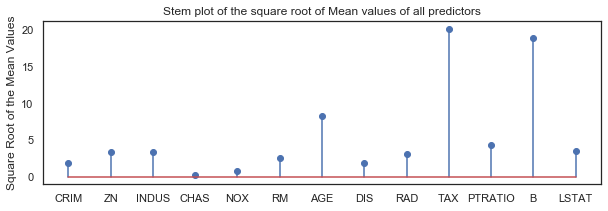

In [9]:
plt.figure(figsize=(10,3))
plt.stem(b_housing.describe().loc['mean'][0:13].index,np.sqrt(b_housing.describe().loc['mean'][0:13]));
plt.title("Stem plot of the square root of Mean values of all predictors")
plt.ylabel('Square Root of the Mean Values');

The mean, minimum and maximum value of each predictor variable, show that all varaibles have scales of disparate proportions. Modeling the data with such disparate scales may lead to biased results, hence the need for **normalization or standardization** of the data. Which procedure is appropriate depends on the properties of the dataset. 

$\color {blue}{\text{Normalization}}$ - 

* Is employed when the distribution of the dataset is unknown or not gaussian.
* Rescales values to a range between 0 and 1
* Sensitive to outliers and retains shape of original distribution
* May not Preserve the relationship between datapoints
* This brings all the features in the dataset to a common scale.

$\color {blue}{\text{Standardization}}$ - 

* Employed when distribution of dataset is unknown or gaussian
* Centers data around mean and scales to standard deviation of 1
* Insensitive to outliers and changes the shape of original distribution
* Preserves the relationship between data points

**For this dataset, we use both and use the one that gives the least RMSE**

* **Specify your response and predcitor variables for the regression analysis**

In [10]:
X = b_housing.iloc[:,0:13]
#X = pd.DataFrame({'Lower Status': b_housing['LSTAT'],'Rooms per Dwelling': b_housing['RM']})
Y = b_housing.MEDV

* **Split the dataset into training and test data**

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

* **Normalization of Boston Housing Data**

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_train_cp = X_train.copy()
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_cp)
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns)

X_test_cp = X_test.copy()
X_test_norm = norm.transform(X_test_cp)

In [13]:
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_norm_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* **Standardization of Boston Housing Data**

In [14]:
from sklearn.preprocessing import StandardScaler
X_train_cp2 = X_train.copy()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cp2)

X_test_cp2 = X_test.copy()
X_test_scaled = scaler.transform(X_test_cp2)

In [15]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X.columns)
X_train_scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


* **Exploring for Collinearity between Response Variable & Predictor Variables**

* **Explore the relationships using a Scatter Plot Matrix**

In [16]:
#pd.plotting.scatter_matrix(b_housing,alpha=0.2,figsize=(15,8));

There is a strong positive correlation between the **target and average number of rooms per dwelling**. There is also a strong negative correlation between **median value of owner-occupied homes and lower status of the population**. These two highly correlated variables will be used as the predictor variables for the train dataset in KNN Regression and compared with linear regression. Every other predictor has no significant coorelation with the response variable. 

In [17]:
b_housing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

* **Standardize the data**

* **Apply KNN Regression while tuning the K parameter**

Iteration No. Int64Index([2], dtype='int64') Max.Knn Score 0.7046442656646525
209.6540927886963 ms


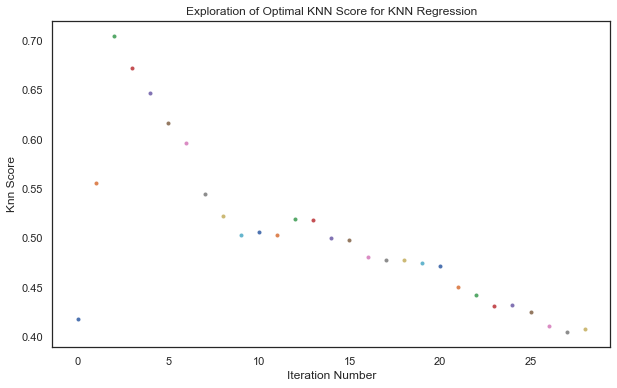

In [18]:
import time
start = time.time()
knn_score=pd.Series(np.zeros(np.arange(1,31).shape))
max_score= -0.0005
plt.figure(figsize=(10,6))
for i in range(0,29):
    knn_regressor = KNeighborsRegressor(n_neighbors = i+1)
    knn_regressor.fit(X_train,Y_train)
    knn_score[i] = knn_regressor.score(X_test,Y_test) 
    plt.plot(i,knn_score[i],marker = '.')
max_score = np.max(knn_score)    
print("Iteration No.",knn_score[knn_score==max_score].index,"Max.Knn Score", max_score)
end = time.time()
print((end-start)*1000,"ms")
plt.xlabel('Iteration Number')
plt.ylabel('Knn Score')
plt.title('Exploration of Optimal KNN Score for KNN Regression');

Assessing these scores, we see that the maximum score of 0.158 is obtained after 9 iterations. This is the R-squared value which optimally should be close to 1. This suggests the KNN model is a poor fit to the data.

In [19]:
#plt.figure(figsize=(12,8))
#plt.scatter(X_train,Y_train,marker='o')

In [20]:
b_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
